# Boston housing data

## Setup the training data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [2]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
boston.data.shape

(506, 13)

In [4]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Create training dataset and test dataset

In [8]:
X = bos.drop('PRICE', axis = 1)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## Train the model with a linear regression

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficents'])

,features,estimatedCoefficents
0,CRIM,-0.156381
1,ZN,0.038549
2,INDUS,-0.025063
3,CHAS,0.786440
4,NOX,-12.946912
5,RM,4.002689
6,AGE,-0.011602
7,DIS,-1.368288
8,RAD,0.341757
9,TAX,-0.013515


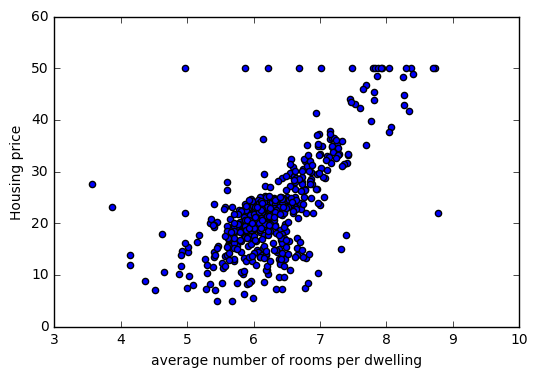

In [11]:
# RM = average number of rooms per dwelling
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Housing price')
plt.show()

## Predict housing prices

In [12]:
Y_train[0:5]

435    13.4
88     23.6
365    27.5
242    22.2
461    17.7
Name: PRICE, dtype: float64

In [13]:
predicted_results = lm.predict(X_train)
predicted_results[0:5]

array([ 13.16072876,  30.41654502,  13.56155988,  24.31597165,  20.60168017])

## Mean Squared Error (MSE)

In [59]:
mse_train = np.mean((Y_train - predicted_results) ** 2)
print(mse_train)

19.54675847353466


In [15]:
predicted_test_results = lm.predict(X_test)
mse_test = np.mean((Y_test - predicted_test_results) ** 2)
print(mse_test)

28.541367275619013


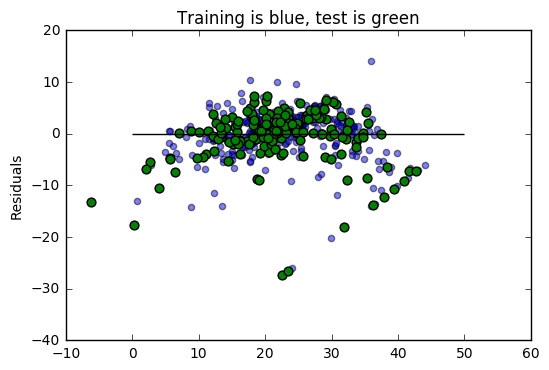

In [16]:
plt.scatter(predicted_results, predicted_results - Y_train, c='b', alpha=0.5)
plt.scatter(predicted_test_results, predicted_test_results - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Training is blue, test is green')
plt.ylabel('Residuals')